In [1]:
%load_ext autoreload
%matplotlib inline

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns  # Seaborn enhances the aesthetics of matplotlib plots

import pandas as pd
import xarray as xr
import seaborn as sns
import warnings
import logging
# sns.set()

from tempest import casestudy
from tempest import grid
from tempest import storm_tracker
from tempest import joint_distrib
from tempest import handler
from tempest.plots.hist import simple_hist


In [2]:
# settings_path = 'settings/sam_4km_30min_30d.yaml'
# "settings/arpege_summer_30d.yaml",
#"settings/fv3_summer_30d.yaml"  ,
settings_paths = [                     
                "settings/obs_summer_30d.yaml", 
                "settings/arpege_summer_30d.yaml", 
                        #"settings/fv3_summer_30d.yaml", "settings/ifs_summer_30d.yaml", 
                "settings/mpas_summer_30d.yaml", 
                    #"settings/nicam_summer_30d.yaml", 
                "settings/sam_summer_30d.yaml", 
                    #"settings/um_summer_30d.yaml"
                    ]
# settings_paths = ["settings/nicam_summer_30d.yaml",  "settings/um_summer_30d.yaml"]
# settings_paths = [ "settings/sam_4km_30min_30d.yaml"]

hdlrs = [handler.Handler(settings_path) for settings_path in settings_paths]
css = [casestudy.CaseStudy(hdlr, overwrite = False ,verbose = False) for hdlr in hdlrs]
grs = [grid.Grid(cs, fast = True, overwrite= False, verbose_steps = False, verbose = False) for cs in css]
jds = [joint_distrib.JointDistribution(gr, None, var_id_1 = "mean_unweighted_Prec", var_id_2 = "cond_alpha_85_Prec", 
        nbpd = 20,  nd=5, overwrite = True, dist_mask = False) for gr in grs]

lm = grs[0].get_landmask()
ocean = lm.Landmask == 0
ocean = ocean.values[:,:,np.newaxis]

Data loaded from /homedata/mcarenso/tempest/OBS_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /homedata/mcarenso/tempest/ARPEGE_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /homedata/mcarenso/tempest/MPAS_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /homedata/mcarenso/tempest/SAM_lowRes_Tropics/var_id_days_i_t.json
Found grid attributes file , so loading /homedata/mcarenso/tempest/OBS_lowRes_Tropics/grid_attributes.pkl instead of computing
Found grid attributes file , so loading /homedata/mcarenso/tempest/ARPEGE_lowRes_Tropics/grid_attributes.pkl instead of computing
Found grid attributes file , so loading /homedata/mcarenso/tempest/MPAS_lowRes_Tropics/grid_attributes.pkl instead of computing
Found grid attributes file , so loading /homedata/mcarenso/tempest/SAM_lowRes_Tropics/grid_attributes.pkl instead of computing


/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them


/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:1123: RuntimeWarning: invalid value encountered in divide
  hist = hist / dedges[i].reshape(shape)


Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them


In [3]:
# import os 
# for jd, gr in zip(jds, grs):
#     cloud_cond_var_ids = ["clouds_cond_prec_15", "vdcs_cond_prec_15", "mcs_cond_prec_15"]
#     for cloud_cond_var_id in cloud_cond_var_ids:
#         sigma = jd.prec.Sigma_cond_alpha_85_Prec
#         mcs_cond = gr.get_var_id_ds(cloud_cond_var_id)
#         sigma_mcs = mcs_cond.Rel_surface.sum(axis = 3) ## add this
#         mcs_cond["intersection_"+cloud_cond_var_id] = sigma_mcs/sigma ## add this 
#         mcs_cond_file = gr.get_var_ds_file(cloud_cond_var_id)
#         os.remove(mcs_cond_file)
#         mcs_cond.to_netcdf(mcs_cond_file)

In [4]:
 np.logical_or(~ocean, ocean).shape

(60, 360, 1)

OBS_lowRes_Tropics
ARPEGE_lowRes_Tropics
MPAS_lowRes_Tropics
SAM_lowRes_Tropics


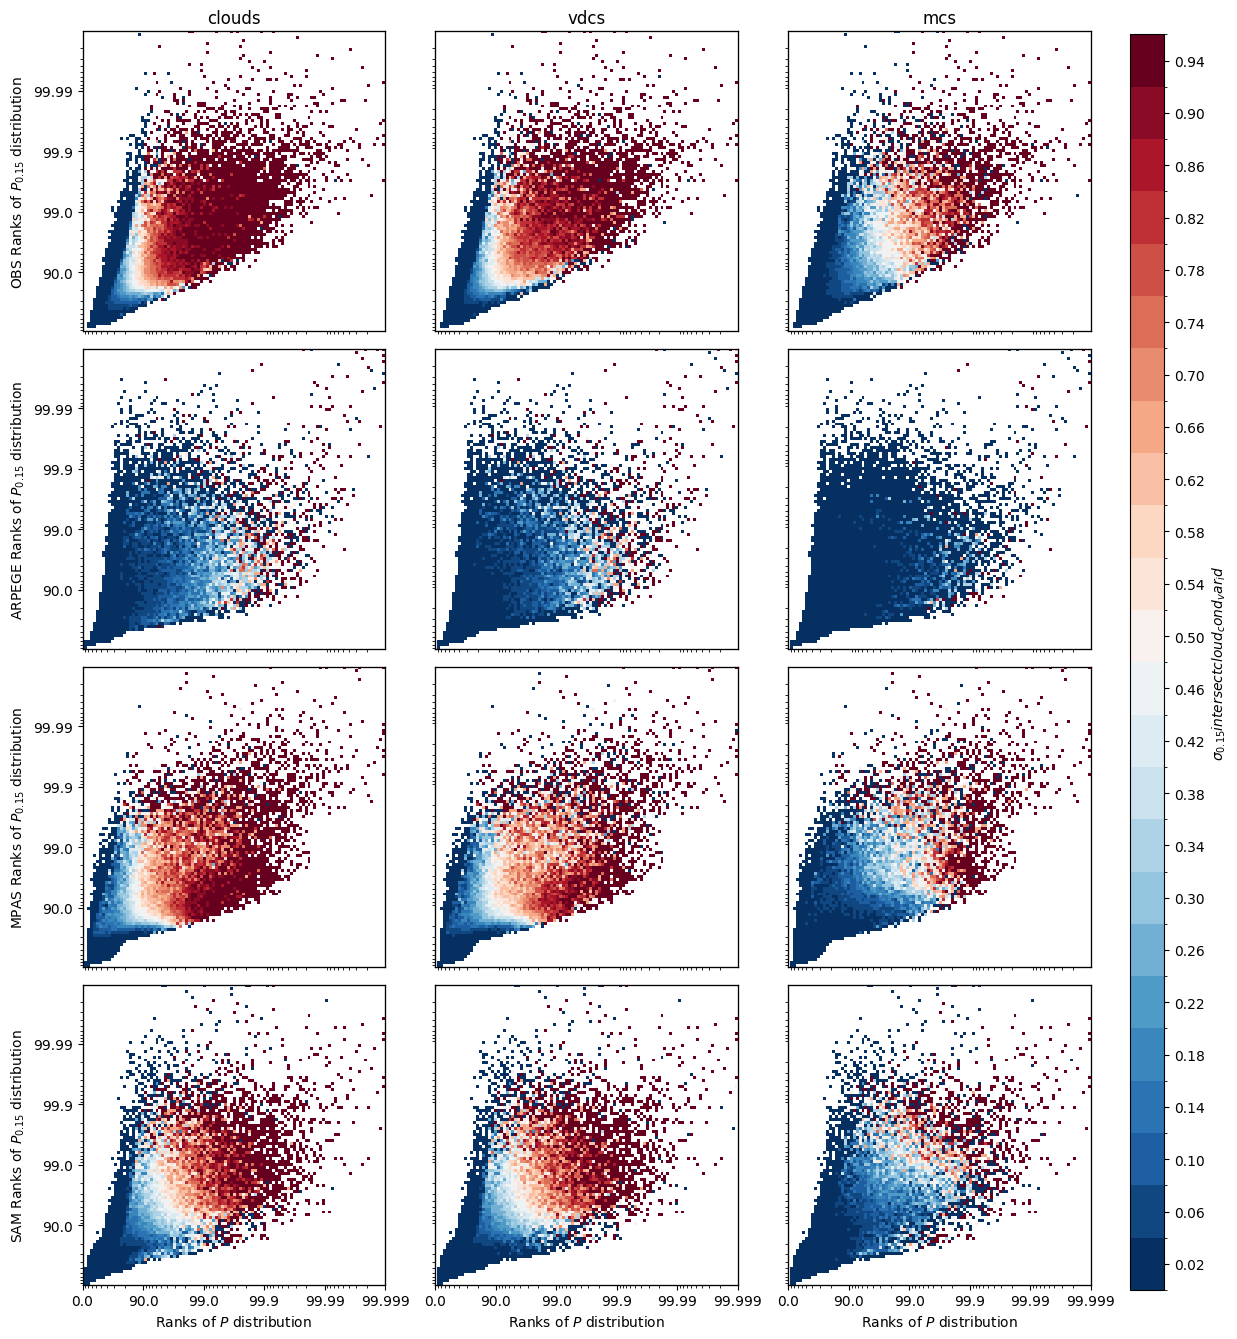

In [5]:
fig, axs  = plt.subplots(4, 3, figsize = (1.419*8, 1.5*9)) #, sharex=True, sharey=True)

plt.subplots_adjust(left=0.01, right=0.99, top=0.99, bottom=0.01, wspace=0.01, hspace=0.01)

cloud_cond_var_ids = ["clouds_cond_prec_15", "vdcs_cond_prec_15", "mcs_cond_prec_15"]

cmap = plt.cm.RdBu_r
values_and_boundaries = np.arange(0, 1, 0.02)
values = values_and_boundaries[1::2]
boundaries  = values_and_boundaries[::2]
norm = mpl.colors.BoundaryNorm(boundaries, cmap.N)

for i, jd, gr, axes in zip(range(len(jds)), jds, grs, axs):
    print(jd.name)
    for j, cloud_cond_var_id, ax in zip(range(len(axes)), cloud_cond_var_ids, axes):
        if i == 0 : 
            title = cloud_cond_var_id.split("_")[0]
        else : 
            title = None
            
        ax, cbar, ax_show = jd.plot_var_id_func_over_jdist(cloud_cond_var_id, title=title,  func = 'intersection_over_half_intersection', mask = np.repeat(np.logical_or(~ocean, ocean), 30, axis=2), cmap = cmap, norm = norm, fig = fig, ax = ax)
        cbar.remove()

        if title is None:
            ax.set_title("")
        # ax.set_title(r"$\rho_{0.5} $ for joint bins of $(P; P_{0.5})$")
        if j == 0:
            ax.set_ylabel(jd.name.split("_")[0] + r" Ranks of $P_{0.15}$ distribution")
        else:
            ax.set_ylabel("")
            ax.tick_params(left=False, labelleft=False)
        if i == len(jds) - 1:
            ax.set_xlabel(r"Ranks of $P$ distribution")
        else:
            ax.set_xlabel("")
            ax.tick_params(bottom=False, labelbottom=False)

# plt.subplots_adjust(wspace=0.0, hspace=0.0)
plt.tight_layout()
cax = fig.add_axes([1, 0.04, 0.03, 0.93])  # [left, bottom, width, height]
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax, ticks=values, spacing='proportional')
cbar.set_label(r'$\sigma_{0.15} intersect cloud_cond_var_id$')
# plt.savefig("figures/fig4.png")
        # fig.tight_layout()
        # plt.savefig('discrete_threshold_on_joint_dist.png', bbox_inches='tight')
        # # fig.tight_layout()
        # plt.savefig('discrete_threshold_on_joint_dist.png', bbox_inches='tight')

In [6]:
### MCS contributions to extremes
jd_obs, gr_obs = jds[0], grs[0]
mcs_15 = gr_obs.get_var_id_ds("mcs_cond_prec_15")
# mcs_15.intersection_over_half_intersection_mcs_cond_prec_15
# mcs_15.intersection_mcs_cond_prec_15
mcs_15_on_jdist = jd_obs.compute_conditional_data_over_density(mcs_15.intersection_over_half_intersection_mcs_cond_prec_15)
print(np.nanmean(mcs_15_on_jdist[jd_obs.dist1.ranks>99, :]))
print(np.nanmean(mcs_15_on_jdist[:, jd_obs.dist2.ranks>99]))

In [6]:
# import os 
# for jd, gr in zip(jds, grs):
#     cloud_types = ["clouds_cond_prec_15", "vdcs_cond_prec_15", "mcs_cond_prec_15"]
#     cloud_cond_var_ids = ["intersection_clouds_cond_prec_15", "intersection_vdcs_cond_prec_15", "intersection_mcs_cond_prec_15"]
#     for cloud_cond_var_id, cloud_type in zip(cloud_cond_var_ids, cloud_types):
#         mcs_cond = gr.get_var_id_ds(cloud_type)
#         bool_covered = mcs_cond[cloud_cond_var_id]>0.5
#         mcs_cond["intersection_over_half_"+cloud_cond_var_id] = bool_covered ## add this 
#         mcs_cond_file = gr.get_var_ds_file(cloud_type)
#         os.remove(mcs_cond_file)
#         mcs_cond.to_netcdf(mcs_cond_file)

In [4]:
# for gr in grs:
#     st = storm_tracker.StormTracker(gr, label_var_id = "MCS_label", overwrite_storms = True, overwrite = False)
#     # st = storm_tracker.StormTracker(gr, label_var_id = "MCS_Feng", overwrite_storms = True, overwrite = False)


making ds storms ...

Label wise attributes  ['DCS_number', 'INT_TbMin', 'INT_UTC_timeEnd', 'INT_UTC_timeInit', 'INT_classif', 'INT_classif_JIRAK', 'INT_classif_MADDOX', 'INT_distance', 'INT_duration', 'INT_latEnd', 'INT_latInit', 'INT_latmax', 'INT_latmin', 'INT_localtime_End', 'INT_localtime_Init', 'INT_lonEnd', 'INT_lonInit', 'INT_lonmax', 'INT_lonmin', 'INT_qltyDCS', 'INT_surfcumkm2_241K', 'INT_surfmaxPix_241K', 'INT_surfmaxkm2_200K', 'INT_surfmaxkm2_210K', 'INT_surfmaxkm2_220K', 'INT_surfmaxkm2_241K', 'INT_velocityAvg']
Label's Lifecycle wise attributes  ['LC_UTC_time', 'LC_ecc_220K', 'LC_ecc_241K', 'LC_lat', 'LC_localtime', 'LC_lon', 'LC_orientation_220K', 'LC_orientation_241K', 'LC_smajor_220K', 'LC_smajor_241K', 'LC_sminor_220K', 'LC_sminor_241K', 'LC_surfPix_210K', 'LC_surfPix_241K', 'LC_surfkm2_200K', 'LC_surfkm2_210K', 'LC_surfkm2_220K', 'LC_surfkm2_241K', 'LC_tb_90th', 'LC_tbavg_200K', 'LC_tbavg_208K', 'LC_tbavg_241K', 'LC_tbmin', 'LC_velocity', 'LC_x', 'LC_y', 'QCgeo_IRima